In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm
from optimal_threshold import optht, plot_svd_var_explained


import sys
sys.path.insert(0, '../src/')
from hyperbolic_random_graphs import *

font = {'size'   : 20}

matplotlib.rc('font', **font)

### Distance euclidienne, répartition uniforme

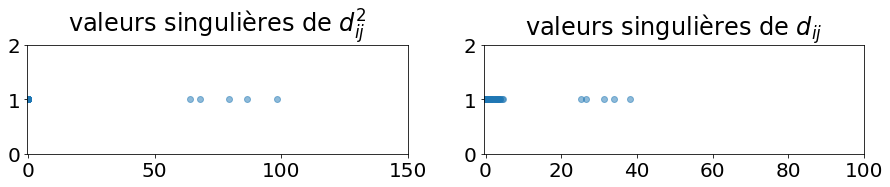

Valeur singulière dominante coupée de l'agradissement


In [83]:
n=200
D=4

def sample_points_on_Sd(nb_vertices, D):
    """Custom method to sample uniformly on hyperspheres

    Parameters
    ----------
    nb_vertices : int
        Number of vertices 
    D : int or float
        Dimension of the hypersphere in a D+1 euclidean space
    """
    coordinates = np.zeros((nb_vertices, D+1))
    for i in range(nb_vertices):
        pos = np.zeros(D+1)
        while np.linalg.norm(pos) < 1e-4:
            pos = np.random.normal(size=D+1)
        coordinates[i] = pos / np.linalg.norm(pos)
    return coordinates


def euclidean_distance_matrix(points):
    n = len(points)
    mat = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            x_i, x_j = points[i], points[j]
            mat[i, j] = np.linalg.norm(x_i-x_j)
    mat += mat.T
    return mat

points = sample_points_on_Sd(n, D)
distance_matrix = euclidean_distance_matrix(points)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 2))

w, s, v = np.linalg.svd(distance_matrix**2, full_matrices=False)
ax1.plot(s, np.ones(s.shape), 'o', alpha=0.5)
ax1.set_title(r'valeurs singulières de $d_{ij}^2$')
ax1.set_ylim(0, 2)
ax1.set_xlim(-0.5,150)

w, s, v = np.linalg.svd(distance_matrix, full_matrices=False)
ax2.plot(s, np.ones(s.shape), 'o', alpha=0.5)
ax2.set_title(r'valeurs singulières de $d_{ij}$')
ax2.set_ylim(0,2)
ax2.set_xlim(-0.5,100)

plt.show()
print('Valeur singulière dominante coupée de l\'agradissement')

### Distance angulaire, répartition uniforme (mêmes points)

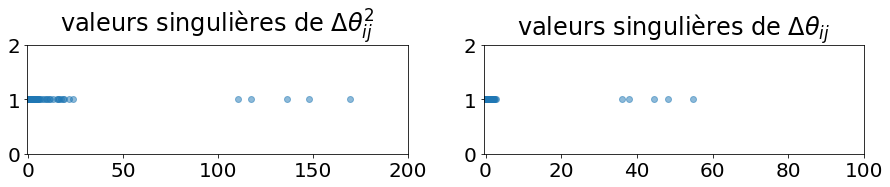

Valeur singulière dominante coupée de l'agradissement


In [84]:
ang_d_matrix = built_angular_distance_matrix(n, points, D, order=None, euclidean=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 2))

w, s, v = np.linalg.svd(ang_d_matrix**2, full_matrices=False)
ax1.plot(s, np.ones(s.shape), 'o', alpha=0.5)
ax1.set_title(r'valeurs singulières de $\Delta\theta_{ij}^2$')
ax1.set_ylim(0, 2)
ax1.set_xlim(-0.5,200)

w, s, v = np.linalg.svd(ang_d_matrix, full_matrices=False)
ax2.plot(s, np.ones(s.shape), 'o', alpha=0.5)
ax2.set_title(r'valeurs singulières de $\Delta\theta_{ij}$')
ax2.set_ylim(0,2)
ax2.set_xlim(-0.5,100)

plt.show()

print('Valeur singulière dominante coupée de l\'agradissement')

<ipython-input-88-d2f742ba35f6>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio = dthetas/np.sqrt(2-2*np.cos(dthetas))


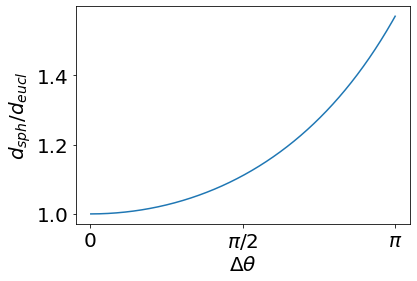

In [88]:
dthetas = np.linspace(0, np.pi, 1000)
ratio = dthetas/np.sqrt(2-2*np.cos(dthetas))
plt.plot(dthetas, ratio)
plt.ylabel(r'$d_{sph}/d_{eucl}$')
plt.xlabel(r'$\Delta\theta$')
plt.xticks([0, np.pi/2, np.pi], ['0', r'$\pi/2$', r'$\pi$'])
plt.show()

### Distance effective $\chi$, $1/(/+\chi)$ et  $1/(/+\chi^\beta)$, mêmes points uniformes

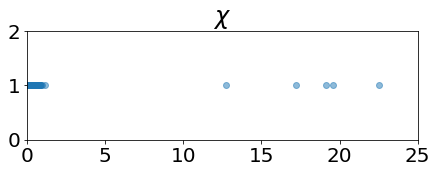

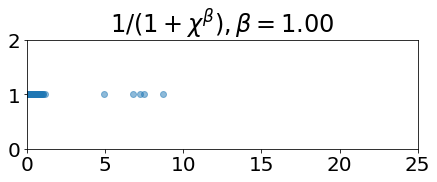

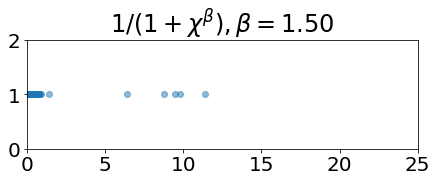

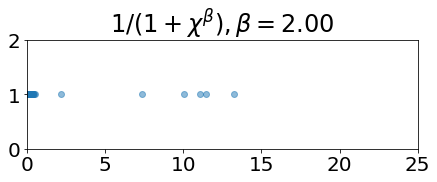

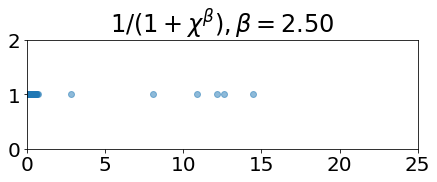

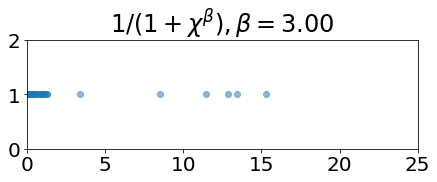

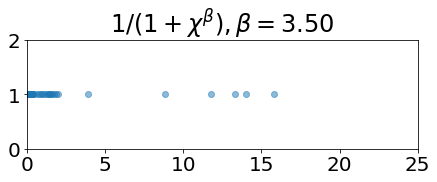

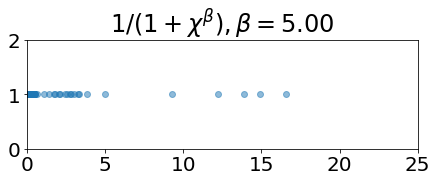

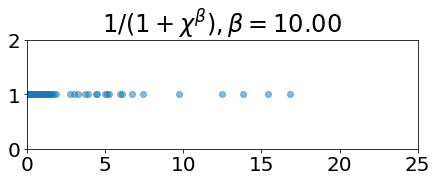

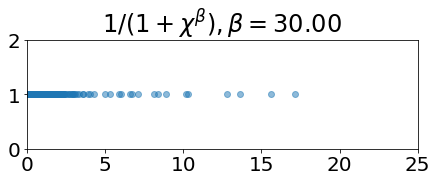

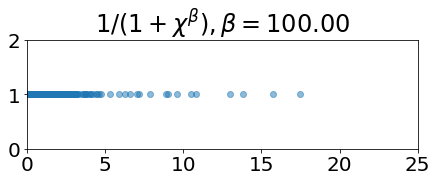

Valeur singulière dominante coupée de l'agradissement


In [9]:
rng = np.random.default_rng()
kappa = get_target_degree_sequence(10., n, rng, dist='pwl').reshape((1,n))
kappa_matrix = np.matmul(kappa.T, kappa)
chi_matrix = ang_d_matrix/(kappa_matrix**(1./D))

plt.figure(figsize=(7, 2))
w, s, v = np.linalg.svd(chi_matrix, full_matrices=False)
plt.plot(s, np.ones(s.shape), 'o', alpha=0.5)
plt.title(r'$\chi$')
plt.ylim(0,2)
plt.xlim(0,25)
plt.show()

for beta in [1., 1.5, 2., 2.5, 3., 3.5, 5., 10., 30., 100.]:
    plt.figure(figsize=(7, 2))
    mat = 1./(1+chi_matrix**beta)
    w, s, v = np.linalg.svd(mat, full_matrices=False)
    plt.plot(s, np.ones(s.shape), 'o', alpha=0.5)
    plt.title(r'$1/(1+\chi^\beta), \beta=${:.2f}'.format(beta))
    plt.ylim(0,2)
    plt.xlim(0,25)
    plt.show()

print('Valeur singulière dominante coupée de l\'agradissement')

### Répartition hétérogène sur $\mathbb{S}^D$ 

data/gpa/3coms/graph1000_exp_gpa_S1_rs3
Sigma unknown:
*************
approximated coefficent w(beta):  2.8600000000000003
optimal coefficent w(beta):  2.8586504329825977
cutoff value:  2.8791349817322813
target rank:  100


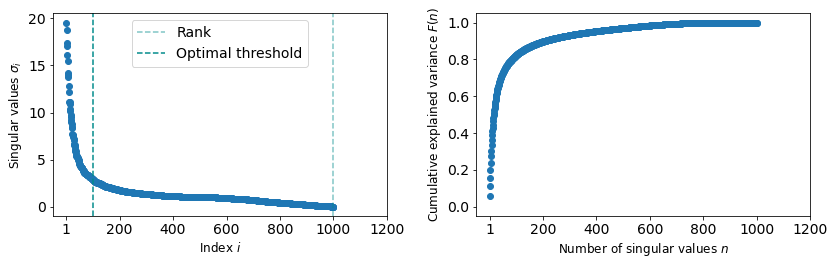

data/gpa/3coms/graph1000_exp_gpa_S2_rs3
Sigma unknown:
*************
approximated coefficent w(beta):  2.8600000000000003
optimal coefficent w(beta):  2.8586504329825977
cutoff value:  2.715560046528327
target rank:  75


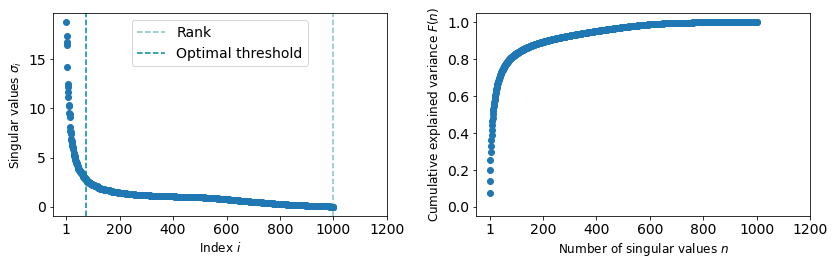

In [75]:
pathsfunfun = ['data/gpa/3coms/graph1000_exp_gpa_S1_rs3', 'data/gpa/3coms/graph1000_exp_gpa_S2_rs3']
paths3com = ['data/gpa/3coms/graph1000_exp_gpa_S1_rs1', 'data/gpa/3coms/graph1000_exp_gpa_S2_rs1']
paths4com = ['data/gpa/3coms/graph1000_exp_gpa_S1_rs4', 'data/gpa/3coms/graph1000_exp_gpa_S2_rs4']

for path in pathsfunfun:
    mod = ModelSD()
    mod.load_parameters(path+'_params.txt')
    mod.load_hidden_variables(path+'.dat')
    mod.build_probability_matrix(order_theta=True)
    mod.build_chi_matrix(order_theta=True)
    print(path)
    sbm_mat = mod.probs
    plot_svd_var_explained(mod.probs)

### Seuil de Gavish-Donoho d'un SBM bruité

In [76]:
indices = [0, 500, 680, 850, -1]
for i in range(len(indices)-1):
    i_start, i_end = indices[i], indices[i+1]
    for j in range(len(indices)-1):
        j_start, j_end = indices[j], indices[j+1]
        sbm_mat[i_start:i_end, j_start:j_end] = np.mean(sbm_mat[i_start:i_end, j_start:j_end])


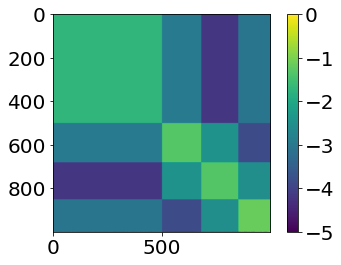

In [77]:
plt.imshow(np.log10(sbm_mat+1e-5), vmin=-5, vmax=0)
plt.colorbar()
plt.show()

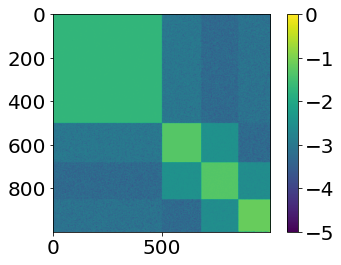

In [78]:
noise = np.random.normal(size=sbm_mat.shape)
sbm_mat += 0.001*noise
plt.imshow(np.log10(abs(sbm_mat+1e-5)), vmin=-5, vmax=0)
plt.colorbar()
plt.show()

Sigma unknown:
*************
approximated coefficent w(beta):  2.8600000000000003
optimal coefficent w(beta):  2.8586504329825977
cutoff value:  0.07321105860539179
target rank:  6


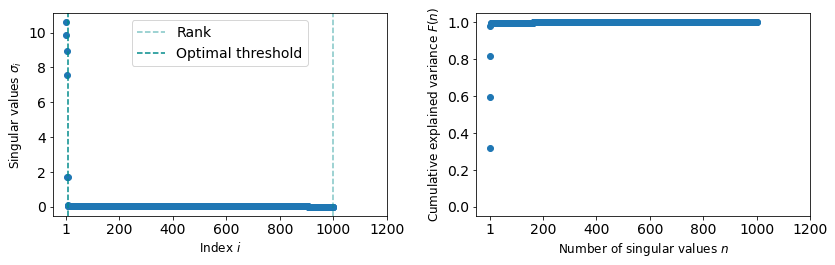

In [79]:
plot_svd_var_explained(mod.probs)